# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
data = pd.read_csv('/content/drive/My Drive/PGDSBA/foodhub_order.csv')

In [ ]:
# copying data to another variable to avoid any changes to original data
df = data.copy()
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Check the number of rows and columns are present in the data
df.shape

(1898, 9)

#### Observations:
*   *The dataset has 1898 rows and 9 columns.*



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
*   *Columns `order_id`, `customer_id`, `food_preparation_time` and `delivery_time` are of int64(integer) type.*
*   *Column `cost_of_the_order` is of float64(float) type.*
*   *Columns `restaurant_name`, `cuisine_type`, `day_of_the_week` and `rating` are of object(String) type.*
*   *All the columns have 1898 observations.*







### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Check for number of missing values in each column of dataset
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* *There are no missing values in the dataset.*  
* *The `rating` column is being read as a 'object' data type instead of integer.*

In [ ]:
# Check for the unique values given for rating
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

* *Upon checking the unique values for `rating`, we get 'Not given', '5', '3', '4'.*

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

* *Number of orders that have rating 'Not given' is 736, which is nearly 40% of the data.*
* *Imputing the 'Not given' with 0 can skew the data, dropping these rows will results in loss of data. Hence, we keep the data as it is.*

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Check the statistical summary of the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
* *The above table displays the statistical summary of all columns.*
* *About 71% of orders are placed on weekends.*
* *The average cost of order is 16.5 dollars, the lowest cost being 4.47 dollars and the highest cost being 35.41 dollars.*
* *About 30% of orders are of American cuisine, which is the top most preferred.*
* *Shake Shack has the highest number of orders.*
* *The minimum, average, and maximum time it takes for food to be prepared once an order is placed are 20 mins, 27.37 mins and 35 mins respectively.*
* *The minimum, average, and maximum time it takes for food to be delivered are 15 mins, 24.16 mins and 33 mins respectively.*
* *About 38% of the orders have no rating.*

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
*  *736 orders are not rated.*

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Univariate analysis of numerical variables


1.  Observations on the Cost of order



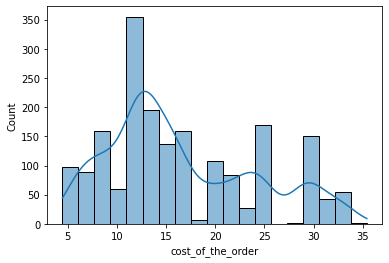

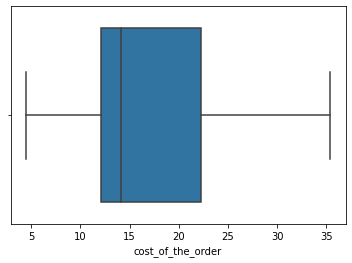

In [ ]:
sns.histplot(data=df, x='cost_of_the_order', kde =True)
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

* *`cost_of_the_order` plot is right-skewed, and does not have any outliers.*
* *Median value is near $14.This implies people prefer ordering for less than 15 dollars.*
* *The maximum cost of order is about 35 dollars, and that could be the highly priced item.*


2.  Observations on the Food Preparation Time

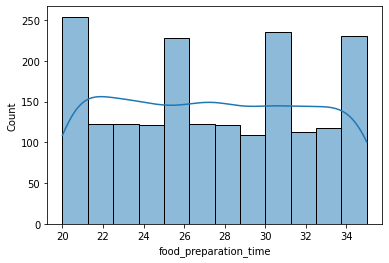

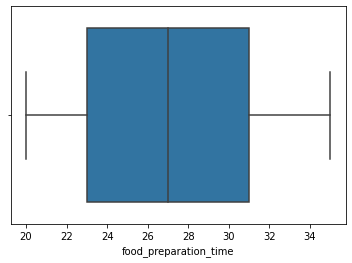

In [ ]:
sns.histplot(data=df, x='food_preparation_time', kde =True)
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

* *The distribution for `food_preparation_time` looks almost symmetrical (although skewed slightly to the right), with no outliers.*
* *Median value is 27 mins.*

3.  Observations on the Delivery Time

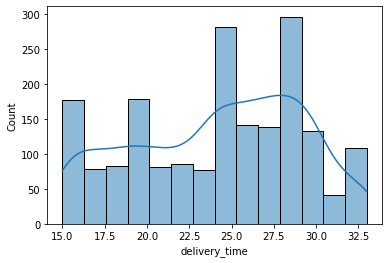

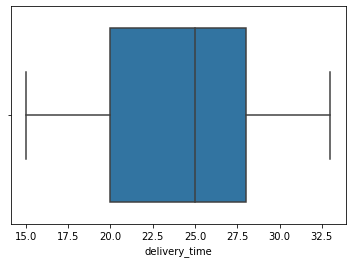

In [ ]:
sns.histplot(data=df, x='delivery_time', kde =True)
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()

* *`delivery_time` plot is left-skewed, and does not have any outliers.*
* *Median value is about 25 mins.*

4. Observations on the unique order ID

In [ ]:
df['order_id'].nunique()

1898

* *Order IDs must be unique, hence there are 1898 values.*

5. Observations on the unique customer ID

In [ ]:
df['customer_id'].nunique()

1200

* *There are 1200 unique customer IDs in the dataframe.*
* *Since the dataframe consists of 1898 rows, we can infer that some are frequent customers.*

6. Observations on the restaurant names

In [40]:
df['restaurant_name'].nunique()

178

* *There are 178 restaurants currently covered by the app.*

### Univariate analysis of categorical variables

1.  Observations on the Cuisine Type

In [ ]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [ ]:
df['cuisine_type'].nunique()

14

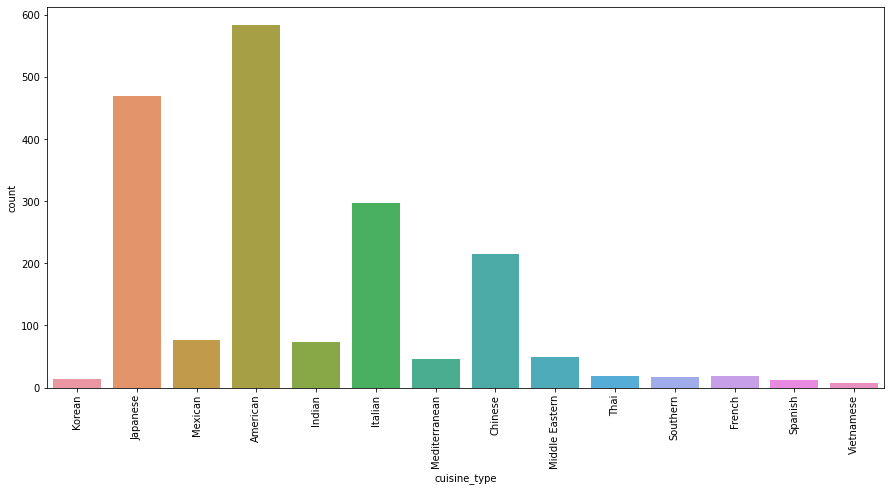

In [ ]:
plt.figure(figsize=[15,7])
sns.countplot(data=df, x='cuisine_type');
plt.xticks(rotation=90);
plt.show()

* *There are 14 unique types of cuisines.*
* *American is the most preferred cuisine, followed by Japanese, Italian and Chinese.*
* *30.7% ordered American cuisine, while 24.7% ordered Japanese.*
* *Vietnamese cuisine is the least preferred with about 0.003% ordering it, followed by Spanish with 0.006%.*


2.  Observations on whether the order is placed on a weekday or weekend

In [ ]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

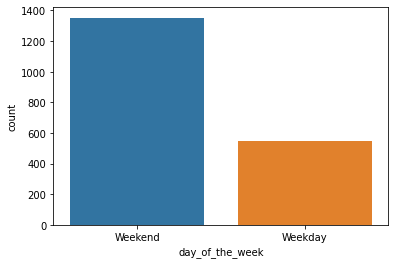

In [ ]:
sns.countplot(data=df, x='day_of_the_week');
plt.show()

* *The case study takes up only 2 values for `day_of_the_week`, Weekend and Weekday.*
* *Around 71% of the orders are placed on the Weekend.*

3.  Observations on the rating given by the customer out of 5

In [ ]:
df['rating'].nunique()

4

In [ ]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

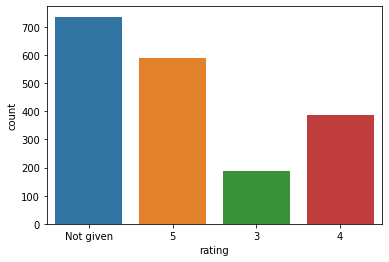

In [ ]:
sns.countplot(data=df, x='rating');
plt.show()

* *Most of the orders (around 38%) are not rated.*
* *Around 31% of orders were rated 5.*
* *20.3% were rated 4 and 9.9% were rated 3.*

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
* *Top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.*

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
* *American is the most popular cuisine on Weekends.*

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
percentage = (df[df['cost_of_the_order']>20].shape[0]/df.shape[0])*100
print("Percentage of orders that cost more than $20 is", round(percentage, 2), "%.")

Percentage of orders that cost more than $20 is 29.24 %.


#### Observations:
* *29.24% orders cost more than $20.*

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
mean_delivery_time = df['delivery_time'].mean()
print("Mean order delivery time is", round(mean_delivery_time, 2), "mins.")

Mean order delivery time is 24.16 mins.


#### Observations:
* *Mean order delivery time is about 24.16 mins.*

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:
* *The following IDs are top 5 most frequent customers:-*

1.   *52832 with 13 orders*
2.   *47440 with 10 orders*
3.   *83287 with 9 orders*
4.   *250494 with 8 orders*
5.   *259341 with 7 orders* 



In [109]:
df.groupby(['customer_id'])['cost_of_the_order'].sum().sort_values(ascending=False).head(15)

customer_id
52832     225.80
250494    183.83
47440     158.18
276192    146.46
83287     139.31
259341    130.81
97991     122.03
82041     120.92
115213    115.40
60039     109.76
97079     107.28
64153     103.17
127149    103.16
60052     102.24
65009      99.49
Name: cost_of_the_order, dtype: float64

* *14 customers have ordered for more than 100 dollars.*
* *Customer with ID 52832 has ordered for 225.80 dollars, which is the highest cummulative cost.*

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


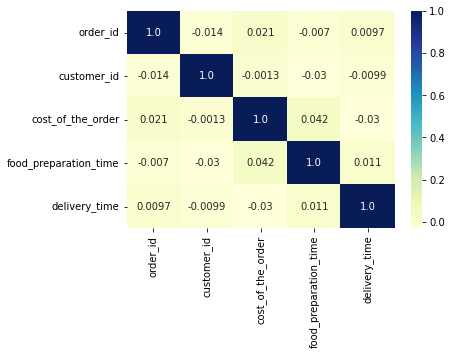

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt=".2")
plt.show()

* *From the heatmap, we see that there is no much correlation between the variables.*

1.  Observations on cuisine_type v/s cost_of_the_order

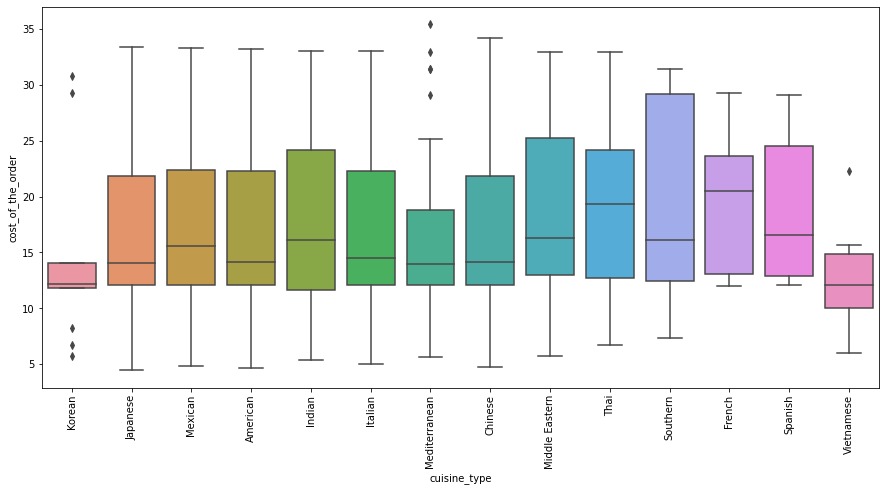

In [ ]:
plt.figure(figsize=[15,7])
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order');
plt.xticks(rotation=90);
plt.show()

* *Box plot is left-skewed for Thai and French cuisines, implies these cuisines cost little more than the remaining cuisines available.*
* *Mediterranian cuisine has recorded the highest price of about $35.*
* *There are outliers for Korean, Mediterranian and Vietnamese cuisines.*
* *Korean and Vietnamese cuisines are available at lower costs when compared to other cuisines.*
* *Median values of Korean, Japanese, American, Italian, Mediterranian, Chinese and Vietnamese are below 15 dollars.*

2.  Observations on cuisine_type v/s rating

<Figure size 1080x504 with 0 Axes>

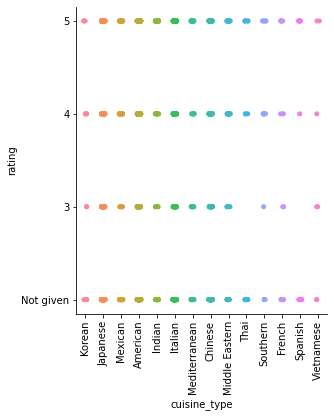

In [47]:
plt.figure(figsize=[15,7])
sns.catplot(data=df, x='cuisine_type', y='rating');
plt.xticks(rotation=90);
plt.show()

* *No clear inference could be drawn from the above plot.*

3. Observations on cuisine_type v/s food_preparation_time

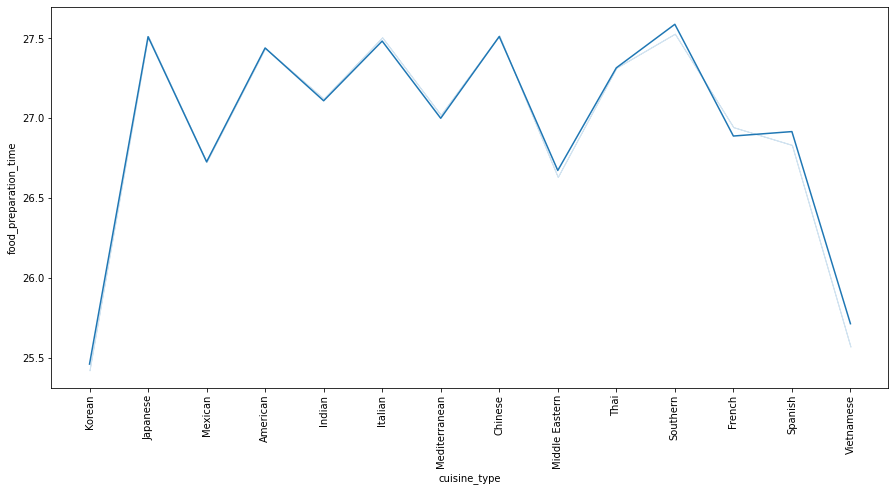

In [55]:
plt.figure(figsize=[15,7])
sns.lineplot(data=df, x='cuisine_type', y='food_preparation_time', ci=False);
plt.xticks(rotation=90);
plt.show()

* *The food preparation time varies from 24 to 29 mins.*
* *Korean cuisine takes the least time for preparation, followed by Vietnamese. This could be a reason for their comparatively low cost.*
* *Southern cuisine takes the most time for preparation.*

4. Observations on cost_of_the_order v/s day_of_the_week

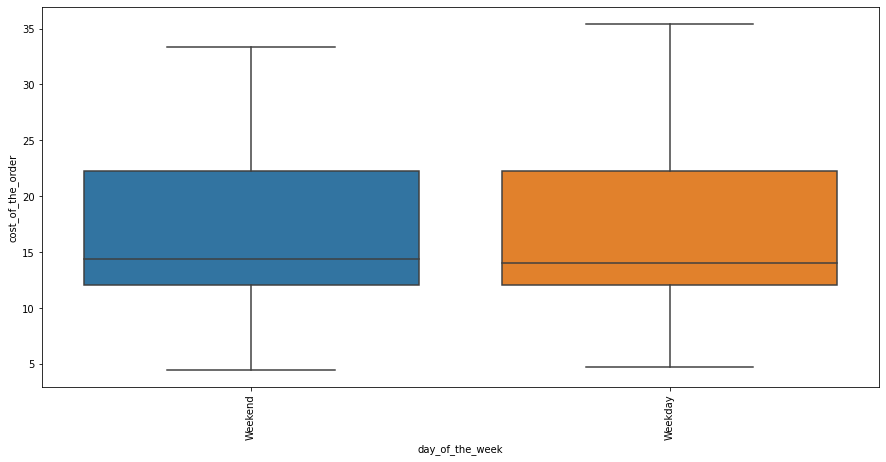

In [56]:
plt.figure(figsize=[15,7])
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order');
plt.xticks(rotation=90);
plt.show()

* *Highest cost of order was recorded on a weekday.*
* *Cost of order distribution is almost the same on weekdays and weekends.*

5.  Observations on cost_of_the_order v/s rating

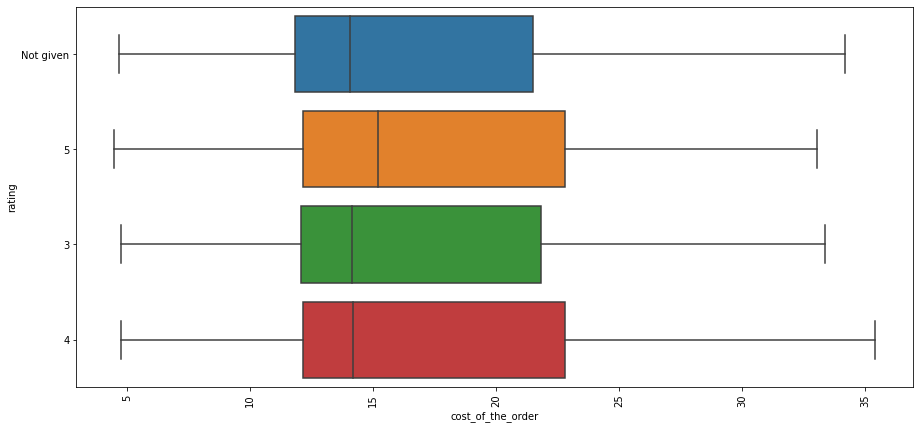

In [58]:
plt.figure(figsize=[15,7])
sns.boxplot(data=df, x='cost_of_the_order', y='rating');
plt.xticks(rotation=90);
plt.show()

* *The most expensive item ordered was rated 4. The second most expensive item was not rated.*
* *Cost less than 15 dollars were either not rated at all or rated 3/4.*


6.  Observations on cost_of_the_order v/s food_preparation_time



<Figure size 1080x504 with 0 Axes>

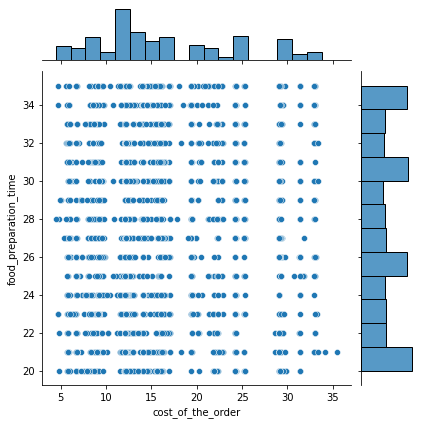

In [62]:
plt.figure(figsize=[15,7])
sns.jointplot(data=df, x='cost_of_the_order', y='food_preparation_time');
plt.xticks(rotation=90);
plt.show()

* *No clear inference could be drawn from the above plot.*

7.  Observations on day_of_the_week v/s food_preparation_time



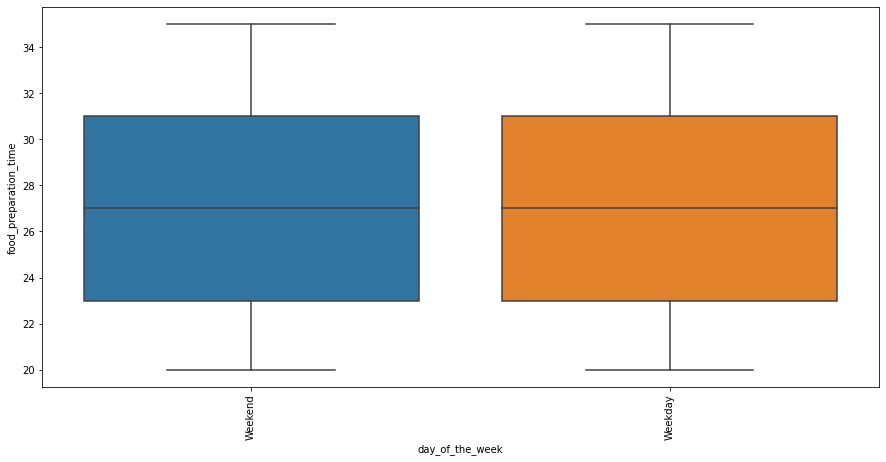

In [64]:
plt.figure(figsize=[15,7])
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time');
plt.xticks(rotation=90);
plt.show()

* *Food preparation time is not affected by the day of the week.*

8.  Observations on day_of_the_week v/s delivery_time

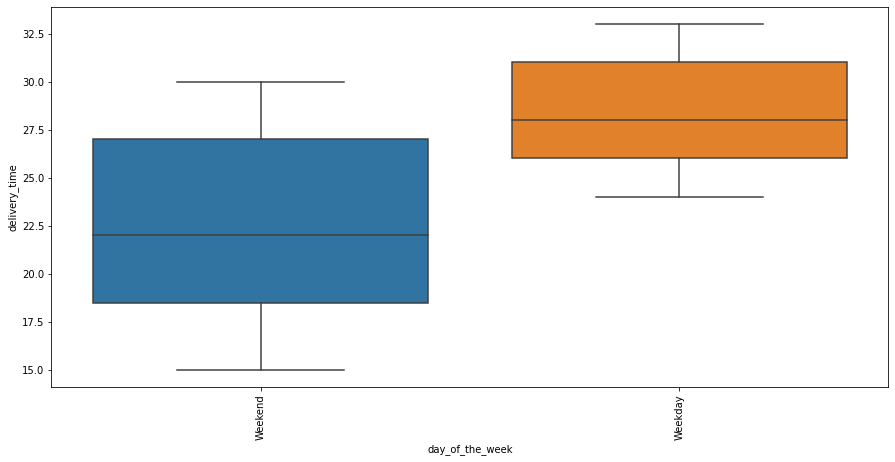

In [ ]:
plt.figure(figsize=[15,7])
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time');
plt.xticks(rotation=90);
plt.show()

* *Delivery time is lesser on weekends than on weekdays.*

9.  Observations on rating v/s food_preparation_time

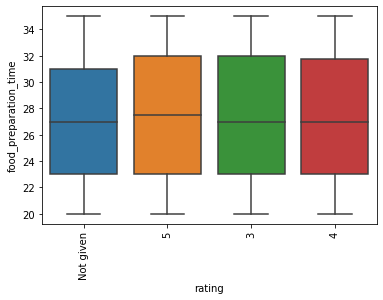

In [72]:
sns.boxplot(data=df, x='rating', y='food_preparation_time');
plt.xticks(rotation=90);
plt.show()

* *No clear inference could be drawn from the above plot.*

10.  Observations on rating v/s delivery_time

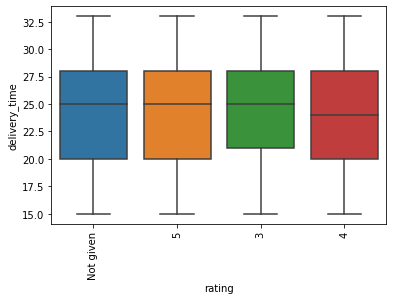

In [73]:
sns.boxplot(data=df, x='rating', y='delivery_time');
plt.xticks(rotation=90);
plt.show()

* *No clear inference could be drawn from the above plot.*

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df1 = df[df['rating']!='Not given'].copy()
df1['rating'] = df1['rating'].astype(int)
df_count = df1.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_avg_rating = df1.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()
df_merged = pd.merge(df_count[df_count['rating']>50], df_avg_rating[df_avg_rating['rating']>4], on='restaurant_name', how='inner')
df_merged.sort_values(by='restaurant_name', ascending=False)

,restaurant_name,rating_x,rating_y
1,The Meatball Shop,84,4.511905
0,Shake Shack,133,4.278195
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
* *The Meatball Shop, Shake Shack, Blue Ribbon Sushi and Blue Ribbon Fried Chicken are eligible to get the promotional offer.*

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
net_revenue = 0
cost_list = df['cost_of_the_order']
for cost in cost_list:
  if cost>20 :
    net_revenue += cost*0.25
  elif (cost>5 and cost<20):
    net_revenue += cost*0.15
  else:
    net_revenue += cost*0
print("Net revenue is", round(net_revenue, 2))
    

Net revenue is 6166.3


#### Observations:
* *Net revenue generated by the company across all orders is $6166.3*

#### Additional insights:

In [113]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).head(10)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64

* *Shake Shack has the maximum revenue, followed by The MeatBall Shop.*
* *Shake Shack, The MeatBall Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm have revenues greater than 1000 dollars.*

In [112]:
df.groupby(['day_of_the_week'])['cost_of_the_order'].sum().sort_values(ascending=False).head()

day_of_the_week
Weekend    22392.60
Weekday     8922.22
Name: cost_of_the_order, dtype: float64

* *Revenue on weekend is about 71%.*

In [111]:
df.groupby(['cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending=False).head()

cuisine_type
American    9530.78
Japanese    7663.13
Italian     4892.77
Chinese     3505.62
Mexican     1303.85
Name: cost_of_the_order, dtype: float64

* *American cuisine has generated maximum revenue, followed by Japanese cuisine.*

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# create a new column in dataframe for total time = food preparation time + delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
# find the percentage of orders take more than 60 minutes to get delivered from the time the order is placed 
# obtained by dividing (number of rows where total time > 60) by (total number of rows)
percentage = (df[df['total_time']>60].shape[0]/df['total_time'].shape[0])*100
print(round(percentage, 2))

10.54


#### Observations:
* *10.54% orders take more than 60 mins to get delivered from the time the order is placed.*

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Finding mean delivery time during weekdays
weekday_mean_delivery_time = df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()
print("Mean delivery time during weekdays is", round(weekday_mean_delivery_time, 2))
# Finding mean delivery time during weekends
weekend_mean_delivery_time = df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()
print("Mean delivery time during weekends is", round(weekend_mean_delivery_time, 2))

Mean delivery time during weekdays is 28.34
Mean delivery time during weekends is 22.47


#### Observations:
* *Mean delivery time during weekdays is 28.34 mins.*
* *Mean delivery time during weekends is 22.47 mins.*


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

*We analysed the data shared by the food aggregator company. We obtained a better idea about the demand of different restaurants, cuisines, etc. which would help the company enhance their customer experience.*

### Conclusions:
* *Majority of orders are placed on weekends, compared to weekdays.*
* *American cuisine is the most preferred, followed by Japanese.*
* *Delivery time of orders on weekdays are lesser compared to that on weekends.*
* *Most of the orders take less than 60 mins to get delivered from the time the order is placed.*
* *Of all the restaurants mentioned, Shake Shack has the highest number of orders.*
* *Cost of order of various cuisines look reasonable.*
* *Many customers have not given a rating.*


### Recommendations:

* *Delivery time of orders on weekends are higher. This could be due to traffic conditions on weekends.*
* *It would be a good decision if the company hires more persons for food delivery, who can work on flexible times, so that weekend demands are properly covered.*
* *The company can focus on American and Japanese cuisines are they are high in demand. Additional discounts or deals for these cuisines can be introduced to increase customer base.*
* *Special offers can be provided for frequent customers.*
* *The company can provide special deals for restaurants with higher number of orders, and some with pricey menu. This can attract customers and help build a long term relationship with such restaurants.*
* *Many customers have not given a rating for the orders. UI of the app can be improved. Using Google to login to the app can help utilise features like sharing Google reviews on the food by the click of a button. This can be used to tap more details on the rating, food quality, etc. This would encourage customers to share their experiences, photos, etc.*
* *Points can be introduced for using the app to order food. Additional point can be rewarded for rating. These points could be redeemed by the customer each time an order is placed through the app.*

---